# Convolutional Neural Network

### Importing the libraries

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [4]:
tf.__version__

'2.4.1'

In [5]:
import matplotlib.pyplot as plt

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('datasets/pokemon/pika_pika/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 50 images belonging to 2 classes.


### Preprocessing the Test set

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('datasets/pokemon/pika_pika/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [8]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [12]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [14]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [15]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [16]:
trained_model = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
2/2 [==============================] - 3s 1s/step - loss: 1.0396 - accuracy: 0.4815 - val_loss: 0.6838 - val_accuracy: 0.5000
Epoch 2/25
2/2 [==============================] - 1s 595ms/step - loss: 0.8433 - accuracy: 0.4281 - val_loss: 1.0058 - val_accuracy: 0.5000
Epoch 3/25
2/2 [==============================] - 1s 301ms/step - loss: 0.7924 - accuracy: 0.5075 - val_loss: 0.7760 - val_accuracy: 0.5000
Epoch 4/25
2/2 [==============================] - 1s 570ms/step - loss: 0.6753 - accuracy: 0.4867 - val_loss: 0.6989 - val_accuracy: 0.5000
Epoch 5/25
2/2 [==============================] - 1s 474ms/step - loss: 0.6462 - accuracy: 0.7225 - val_loss: 0.6772 - val_accuracy: 0.5000
Epoch 6/25
2/2 [==============================] - 1s 634ms/step - loss: 0.6382 - accuracy: 0.6489 - val_loss: 0.6827 - val_accuracy: 0.5000
Epoch 7/25
2/2 [==============================] - 1s 358ms/step - loss: 0.6213 - accuracy: 0.6292 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/25
2/2 [=======

## Part 4 - Making a single prediction

In [24]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('datasets/pokemon/pika_pika/single_prediction/check_4.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'pikachu'
else:
  prediction = 'raichu'

In [25]:
print(prediction)

raichu


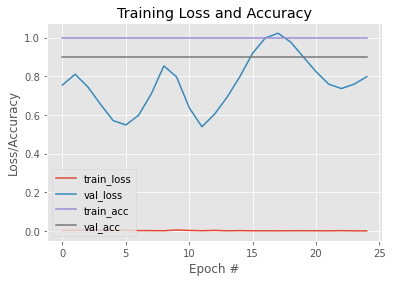